# Learning Image Plot and Matplotlib

Table of Contents

Understanding the Figure Object  
Implementing Figures and Axes  
Figure Parameters  
Subplots Functionality  
Styling - Legends  
Styling - Colors and Styles  

## Plotting Basic Graphs

To plot various graph, I have used weather dataset. The info of the dataset can be found as :

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [335]:
df = pd.read_csv('/home/swodesh/Documents/EKbana/swodeshsharma/Task17_Image_plot/weather.csv')
df.head()

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16743 entries, 0 to 16742
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data.Precipitation         16743 non-null  float64
 1   Date.Full                  16743 non-null  object 
 2   Date.Month                 16743 non-null  int64  
 3   Date.Week of               16743 non-null  int64  
 4   Date.Year                  16743 non-null  int64  
 5   Station.City               16743 non-null  object 
 6   Station.Code               16743 non-null  object 
 7   Station.Location           16743 non-null  object 
 8   Station.State              16743 non-null  object 
 9   Data.Temperature.Avg Temp  16743 non-null  int64  
 10  Data.Temperature.Max Temp  16743 non-null  int64  
 11  Data.Temperature.Min Temp  16743 non-null  int64  
 12  Data.Wind.Direction        16743 non-null  int64  
 13  Data.Wind.Speed            16743 non-null  flo

In [337]:
df = df.sort_values("Date.Month")

Lets change the month with actual names.

In [338]:

replace_dict = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

To rename the column values we use`.replace(some_dictionary)`

In [339]:
df['Date.Month'] = df['Date.Month'].replace( replace_dict )

In [340]:
df['Date.Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

### Bar Graph Using matplotlib

Lets find the month with most avg temperature

In [341]:
table = pd.pivot_table(df,index= "Date.Month",values='Data.Temperature.Avg Temp',aggfunc = np.mean)

/tmp/ipykernel_43665/3581437953.py:1: FutureWarning: The provided callable <function mean at 0x7a31a9db9ab0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df,index= "Date.Month",values='Data.Temperature.Avg Temp',aggfunc = np.mean)


In [342]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
table.index = pd.Categorical(table.index, categories=months, ordered=True)

In [343]:
table

,Data.Temperature.Avg Temp
April,53.885375
August,74.414038
December,35.651420
February,40.870635
January,36.104651
July,75.110051
June,71.557052
March,48.672742
May,61.140063
November,49.756950


In [344]:
table.index

CategoricalIndex(['April', 'August', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September'],
                 categories=['January', 'February', 'March', 'April', ..., 'September', 'October', 'November', 'December'], ordered=True, dtype='category')

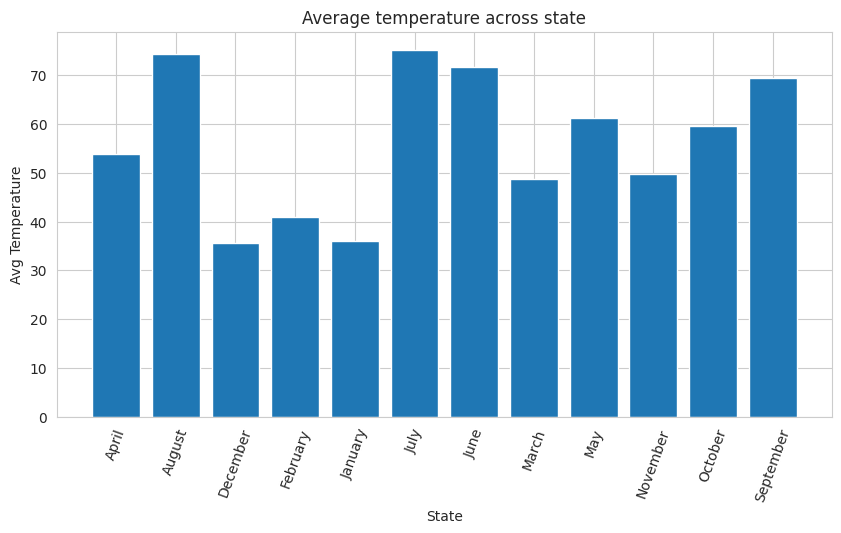

In [345]:
# Putting Title

# Setting fig size
plt.figure(figsize=(10,5))

# Bar graph
plt.bar(table.index,table['Data.Temperature.Avg Temp'] )

# xticks
plt.xticks( rotation = 70)

# x-axis label
plt.xlabel('State')

#y-axis labels
plt.ylabel('Avg Temperature')

plt.title("Average temperature across state")

plt.show()


Changing Color of the plot

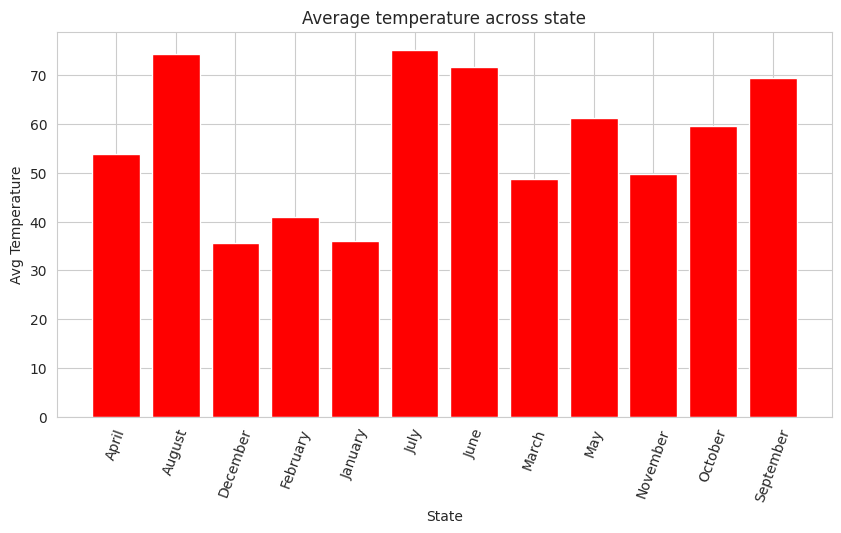

In [346]:
# Putting Title

# Setting fig size
plt.figure(figsize=(10,5))

# Bar graph
plt.bar(table.index,table['Data.Temperature.Avg Temp'] , color = 'red' )

# xticks
plt.xticks( rotation = 70)

# x-axis label
plt.xlabel('State')

#y-axis labels
plt.ylabel('Avg Temperature')

plt.title("Average temperature across state")

plt.show()

### Multi Bar Graph

Lets find the month with most avg temperature

In [347]:
table = pd.pivot_table(df,index= "Date.Month",values= ['Data.Temperature.Avg Temp','Data.Wind.Speed'],aggfunc = np.mean)

/tmp/ipykernel_43665/1110972726.py:1: FutureWarning: The provided callable <function mean at 0x7a31a9db9ab0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df,index= "Date.Month",values= ['Data.Temperature.Avg Temp','Data.Wind.Speed'],aggfunc = np.mean)


In [348]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
table.index = pd.Categorical(table.index, categories=months, ordered=True)

In [349]:
table

,Data.Temperature.Avg Temp,Data.Wind.Speed
April,53.885375,7.258885
August,74.414038,5.204629
December,35.651420,6.768052
February,40.870635,7.402317
January,36.104651,6.920301
July,75.110051,5.663753
June,71.557052,5.866593
March,48.672742,6.952750
May,61.140063,6.332826
November,49.756950,5.826442


Rotate x labes

```python
plt.xticks(rotation= 80) 
```

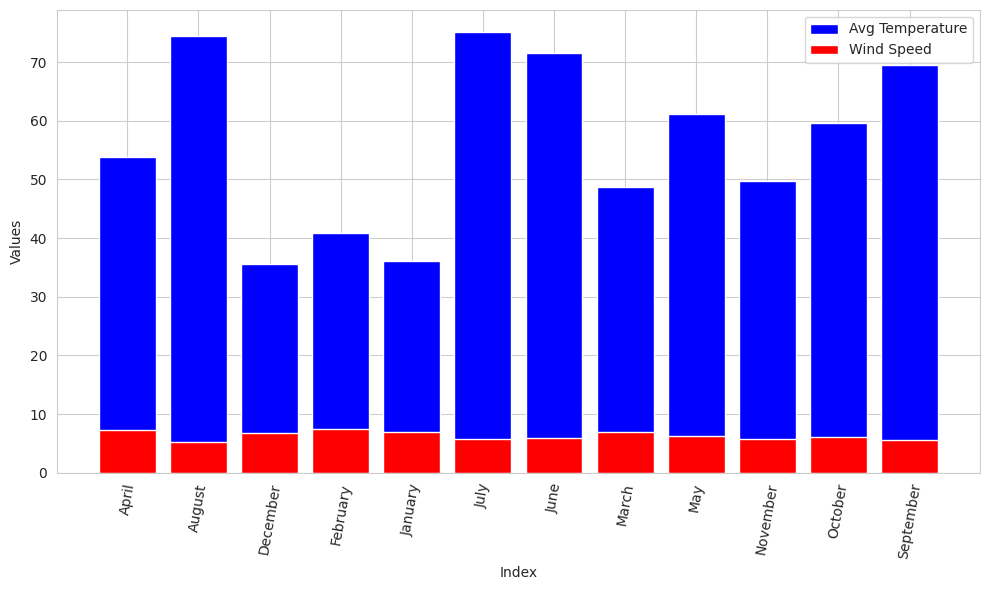

In [350]:
plt.figure(figsize=(10,6))
plt.bar(table.index, table['Data.Temperature.Avg Temp'], color='blue', label='Avg Temperature')
plt.bar(table.index, table['Data.Wind.Speed'], color='red', label='Wind Speed')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(rotation= 80)  # Rotate x-axis labels by 45 degrees
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

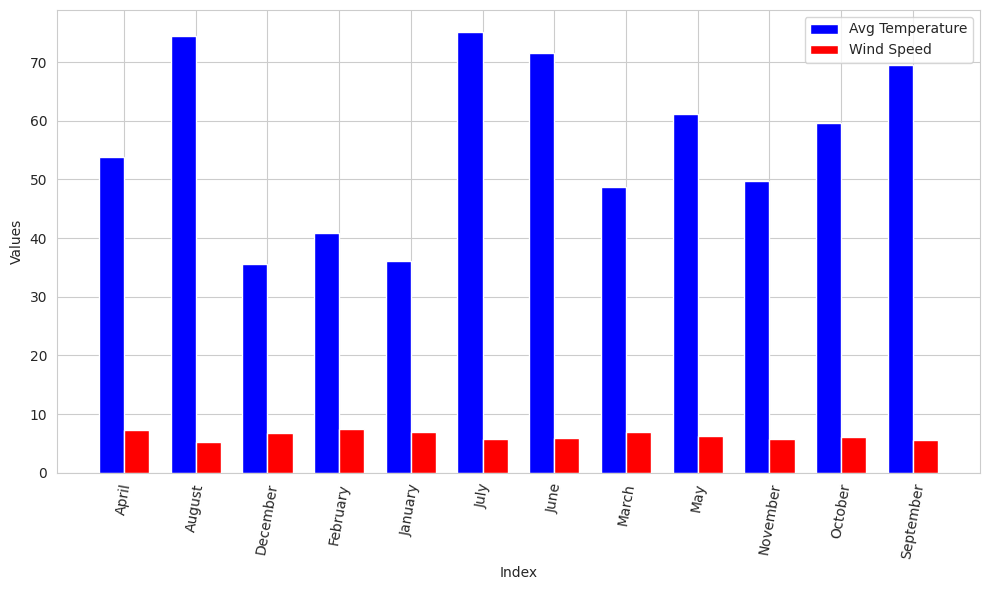

In [351]:
# Define the width of each bar
bar_width = 0.35

plt.figure(figsize=(10,6))

# Plot the first set of bars
plt.bar(np.arange(len(table.index)), table['Data.Temperature.Avg Temp'], width=bar_width, color='blue', label='Avg Temperature')

# Plot the second set of bars, shifted by the bar width
plt.bar(np.arange(len(table.index)) + bar_width, table['Data.Wind.Speed'], width=bar_width, color='red', label='Wind Speed')

plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(np.arange(len(table.index)) + bar_width / 2, table.index)  # Adjust x-axis ticks position
plt.xticks(rotation= 80)  # Rotate x-axis labels by 45 degrees
plt.legend()
plt.tight_layout()
plt.show()


Plotting Horizontally

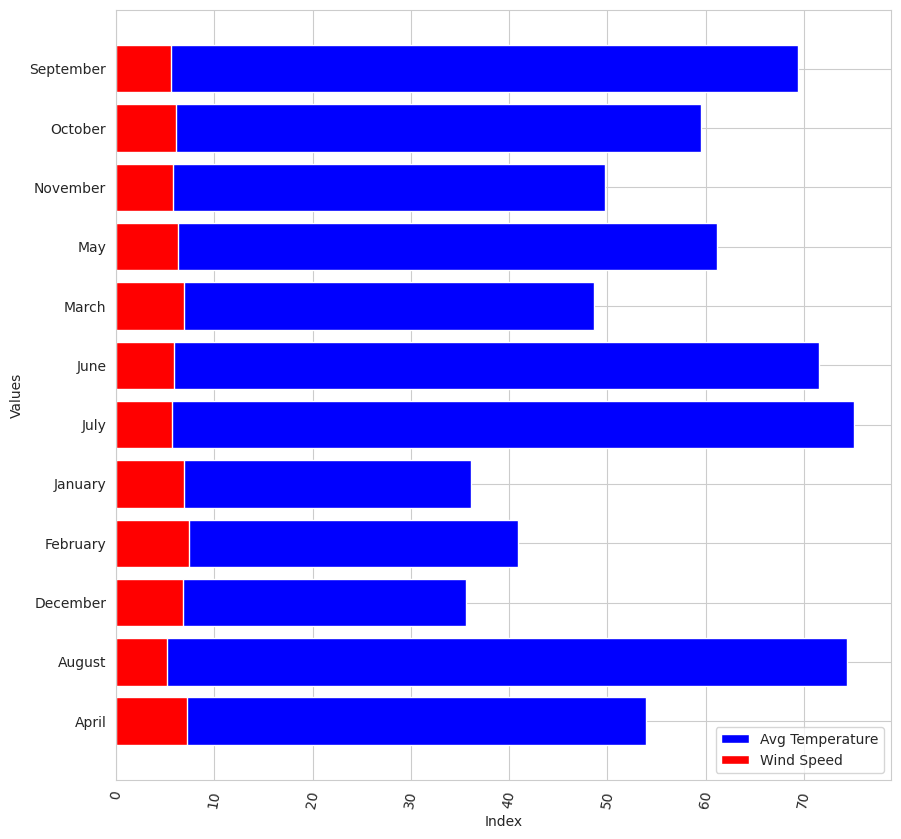

In [352]:
# Plotting horizontally
plt.figure(figsize=(10,10))
plt.barh(table.index, table['Data.Temperature.Avg Temp'], color='blue', label='Avg Temperature')
plt.barh(table.index, table['Data.Wind.Speed'], color='red', label='Wind Speed')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(rotation= 80)  # Rotate x-axis labels by 45 degrees
plt.legend()
#plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [353]:
table = table.sort_index()

### Scatter Plot

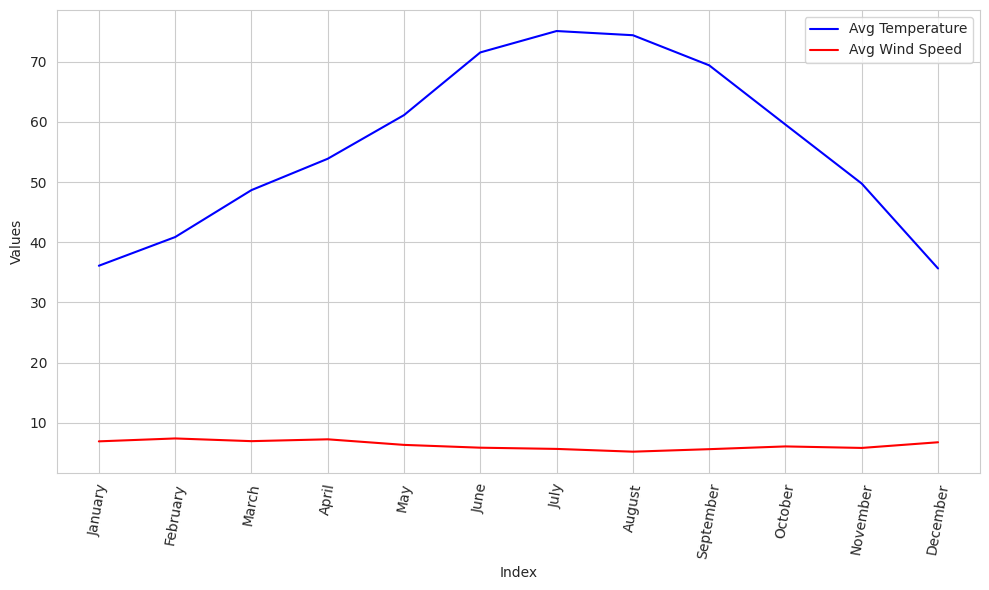

In [354]:
# Lets scatter plot the average temperature variation 
plt.figure(figsize=(10,6))
plt.plot(table.index, table['Data.Temperature.Avg Temp'], color='blue', label='Avg Temperature')
plt.plot(table.index, table['Data.Wind.Speed'], color='red', label='Avg Wind Speed')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(rotation= 80)  # Rotate x-axis labels by 45 degrees
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

### Pie Chart

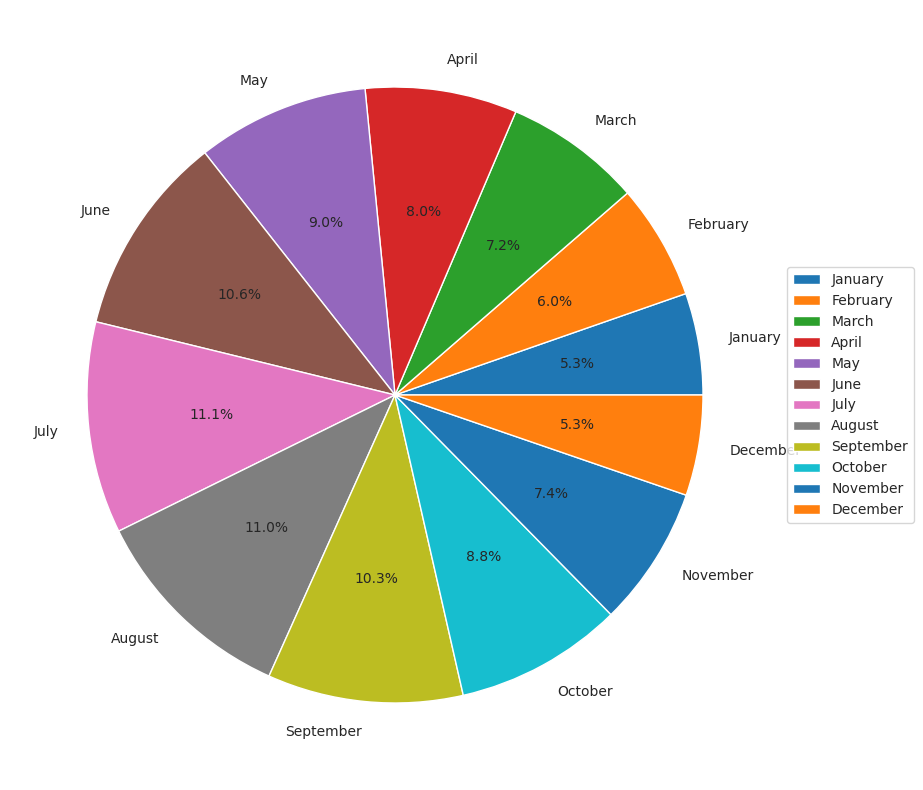

In [355]:
 
plt.figure(figsize=(10, 10))
plt.pie(table['Data.Temperature.Avg Temp'], labels=table.index, autopct='%1.1f%%' )
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Place legend outside the pie chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


**Box Plot using matplotlib**

Box plot gives statistical information about the
distribution of numeric data divided into different
groups. It is useful for detecting outliers within each
group.

The lower, middle and upper part of the box represents the 25th, 50th, and 75th
percentile values respectively

The top whisker represents Q3+1.5*IQR

The bottom whisker represents Q1–1.5*IQR

Outliers are shown as scatter points

<Figure size 700x500 with 0 Axes>

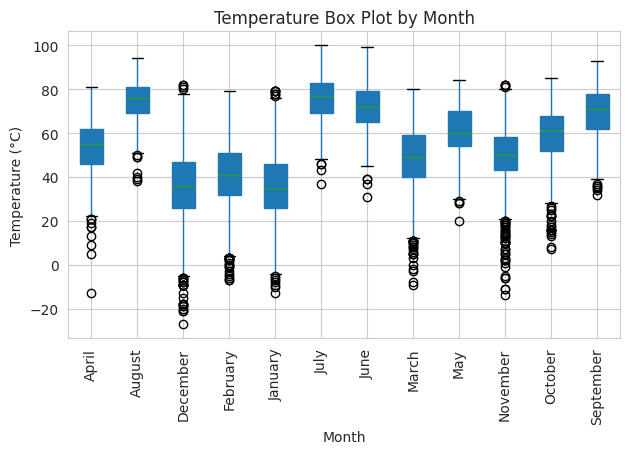

In [356]:
 # Box plot
plt.figure(figsize=(7, 5))
df.boxplot(column='Data.Temperature.Avg Temp', by='Date.Month', grid= True , patch_artist = True)
plt.title('Temperature Box Plot by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.suptitle('')  # Suppress default title
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Another Approach For Box Plot

In [357]:
#dictionary for Temperature of different months
temp_month = {}
for i in df['Date.Month'].unique():
    temp_month[i] = df[df['Date.Month']==i]['Data.Temperature.Avg Temp']

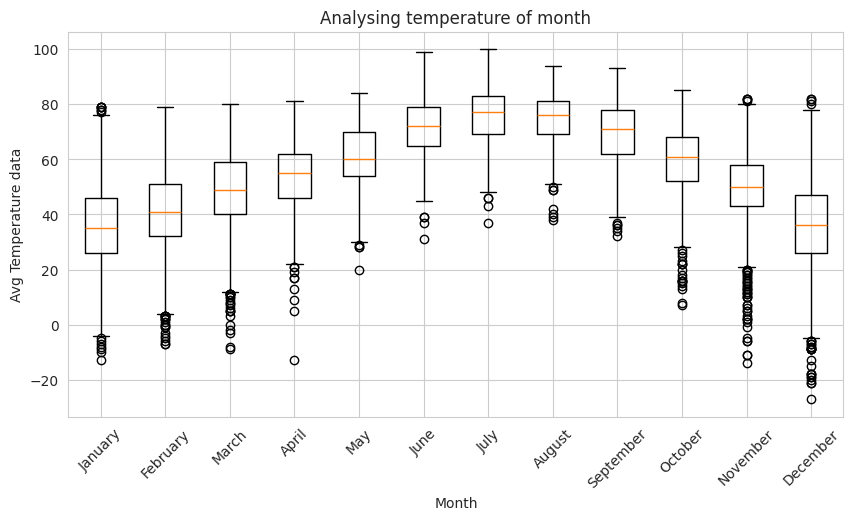

In [358]:
plt.figure(figsize= (10,5))
plt.boxplot([x for x in temp_month.values()],tick_labels=[x for x in temp_month.keys()])
#x and y-axis labels
plt.xlabel('Month')
plt.ylabel('Avg Temperature data')
plt.xticks(rotation = 45)
#plot title
plt.title('Analysing temperature of month')
plt.show()

### Violin Plot

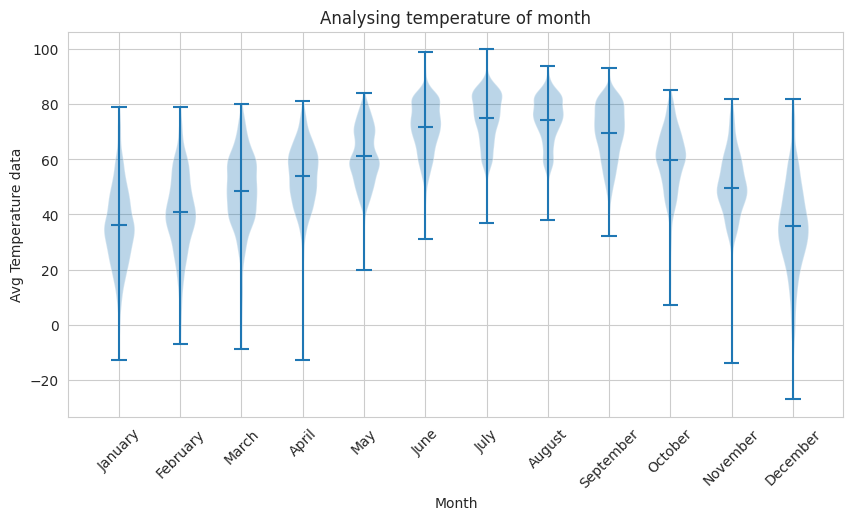

In [359]:
plt.figure(figsize= (10,5))
plt.violinplot([x for x in temp_month.values()] ,showmeans= True, showextrema= True )
#x and y-axis labels
plt.xlabel('Month')
plt.ylabel('Avg Temperature data')
# Set x-axis labels
plt.xticks(range(1, len(temp_month) + 1), [i for i in temp_month.keys()], rotation=45)
plt.xticks(rotation = 45)
#plot title
plt.title('Analysing temperature of month')
plt.show()

### Histograms

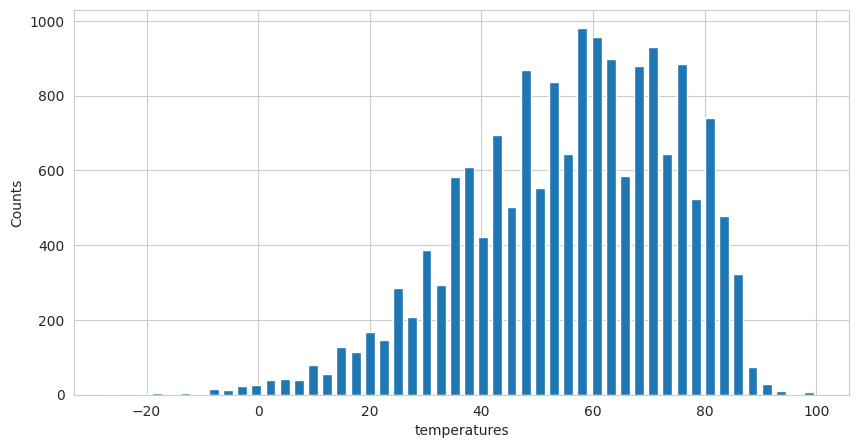

In [360]:
# Creating Histogram , Lets see the histogram plot of the temperature
plt.figure(figsize= (10,5))
plt.hist(df['Data.Temperature.Avg Temp'] , bins = 50 , rwidth= 0.7)
plt.xlabel('temperatures')
plt.ylabel('Counts')
plt.show()

Plotting multiple histograms 

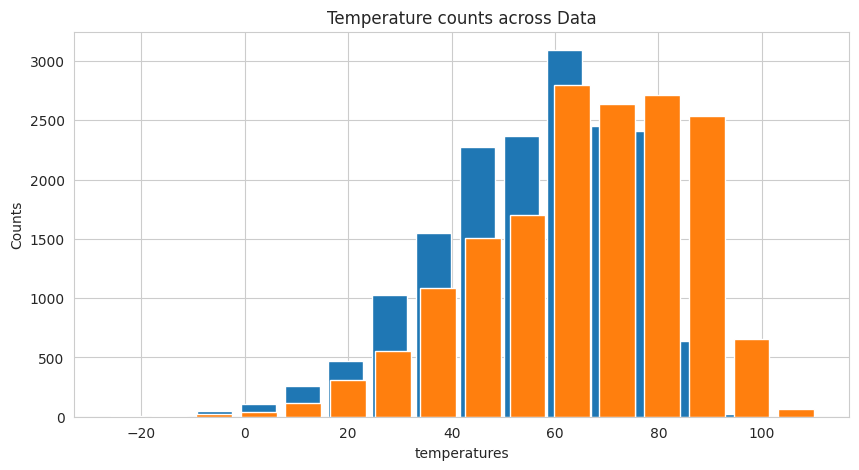

In [361]:

plt.figure(figsize= (10,5))
plt.hist(df['Data.Temperature.Avg Temp'] , bins = 15 , rwidth= 0.8)
plt.hist(df['Data.Temperature.Max Temp'] , bins = 15 , rwidth= 0.8)
plt.xlabel('temperatures')
plt.ylabel('Counts')
plt.title('Temperature counts across Data')
plt.show()

## Difference between bar plot and histograms
`Bar plot` : Used for Categorical Data  
`Histogram` : Used for Continous Data  

# Subplots

### Figure Object

In Matplotlib, the `Figure` object represents the whole figure or window where plots are drawn. It can contain one or more `Axes` objects, each representing an individual plot. The `Figure` object provides methods to customize the overall appearance of the plot, such as size, title, and saving the plot to a file.

Figure is the outermost container for the Matplotlib plot. There can be single or multiple plots called Axes in a figure. Each axes has their own  x and y axis.

To create a plot in Matplotlib, we can start by creating a `Figure` object using `plt.figure()` and then adding one or more `Axes` objects to it using methods like `add_subplot()` or `subplots()`. Each `Axes` object represents a single plot within the figure and is used to set properties like labels, titles, and plot type.

`plt.subplots()` returns the figure and axes.  


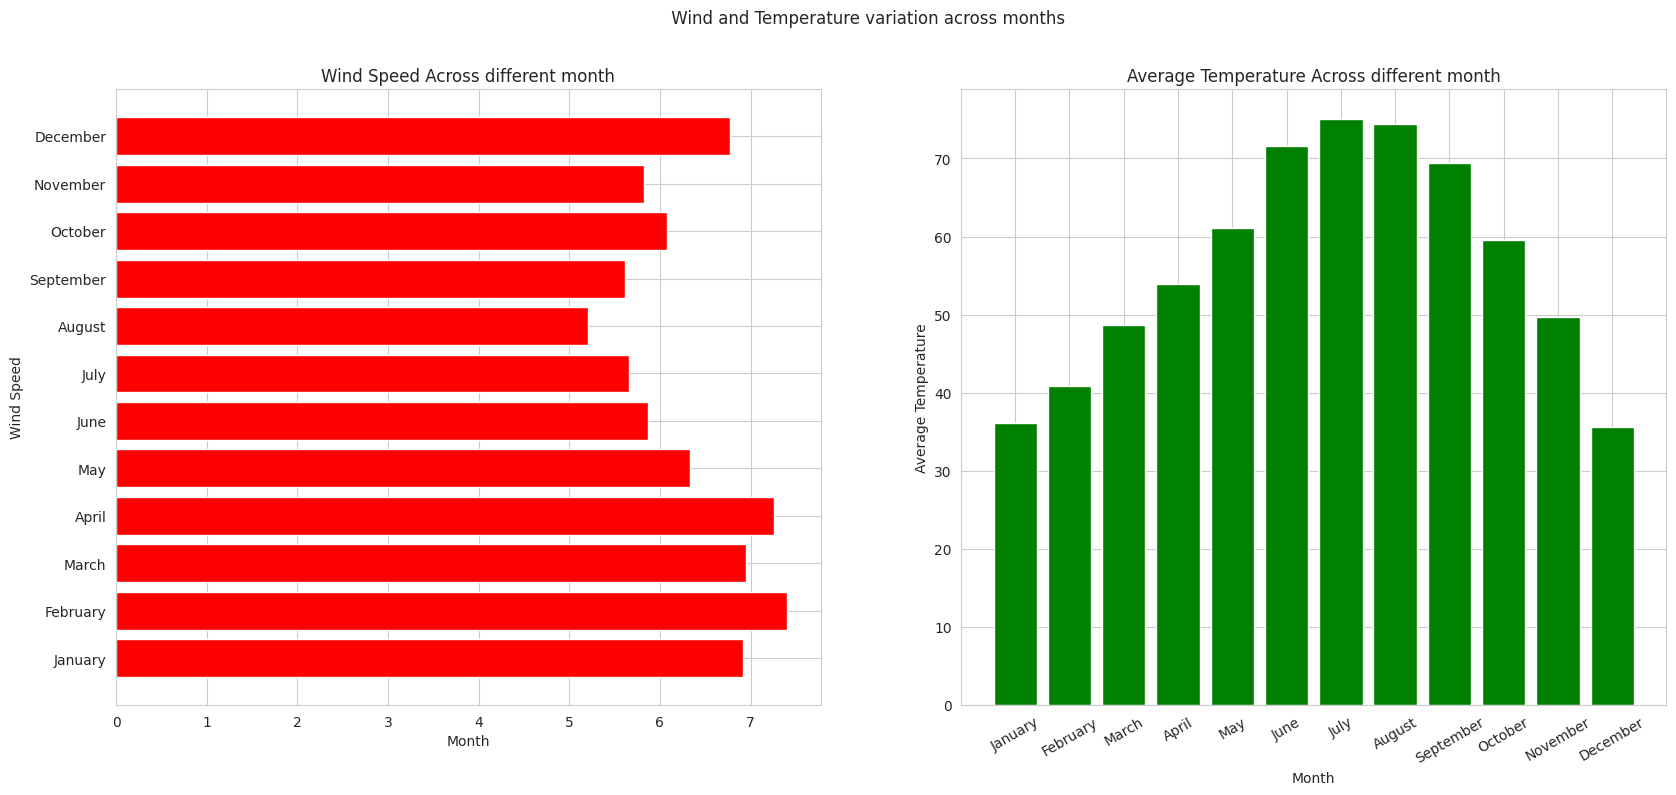

In [362]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

# Plotting in the first axes
ax[0].barh(table.index , table['Data.Wind.Speed'], color = 'red')
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Wind Speed")
ax[0].set_title("Wind Speed Across different month")

# Plotting in the second axes
ax[1].bar(table.index , table['Data.Temperature.Avg Temp'], color = 'green')
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Average Temperature")
ax[1].set_title("Average Temperature Across different month")

plt.xticks(rotation = 30)
plt.suptitle(" Wind and Temperature variation across months")
plt.show()

## Figure Parameters




    figsize(float, float): These parameter are the width, height in inches.
    dpi : This parameter is the resolution of the figure.
    facecolor : This parameter is the background color.
    edgecolor : This parameter is the border color.
    frameon : This parameter suppress drawing the figure frame.
    clear : This parameter if True and the figure already exists, then it is cleared.

Text(0.0, 1.0, 'Axes')

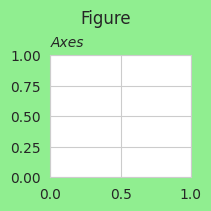

In [363]:
# Changing the background color
fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightgreen', edgecolor = 'red' ,layout='constrained')
fig.suptitle('Figure')
ax.set_title('Axes', loc='left', fontstyle='oblique', fontsize='medium')

## Saving the figure

In [364]:
fig.savefig('empty_plot.png')

# Subfigure

This is a figure inside a figure

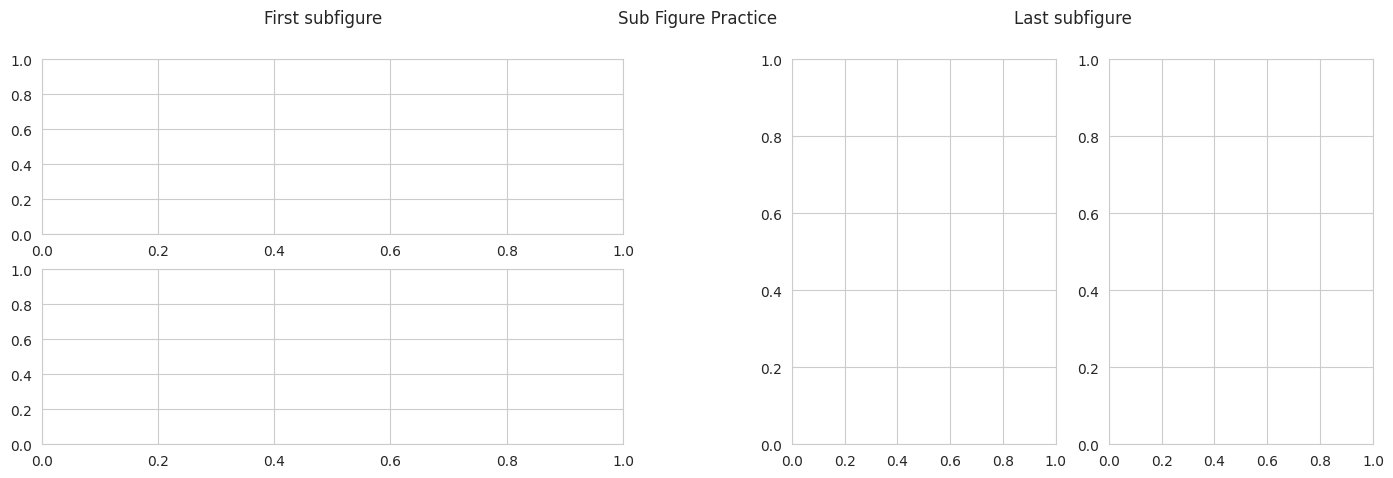

In [365]:
fig = plt.figure( figsize=(15,5))

# Creating four subfigures
sfigs = fig.subfigures(1, 2, width_ratios=[1, 1])

# Adding subplots to first subfigure:
first_ax = sfigs[0].subplots(2, 1)
sfigs[0].suptitle('First subfigure')

# Add subplots to the last subfigure:
last_ax = sfigs[1].subplots(1, 2)
sfigs[1].suptitle('Last subfigure')

# fig.tight_layout()
# suptitle for the main figure:
fig.suptitle('Sub Figure Practice')
plt.show()

Lets plot different graph in a single figure using subfigure

/tmp/ipykernel_43665/2981714393.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  last_ax[1].set_xticklabels(table.index, rotation = 45)


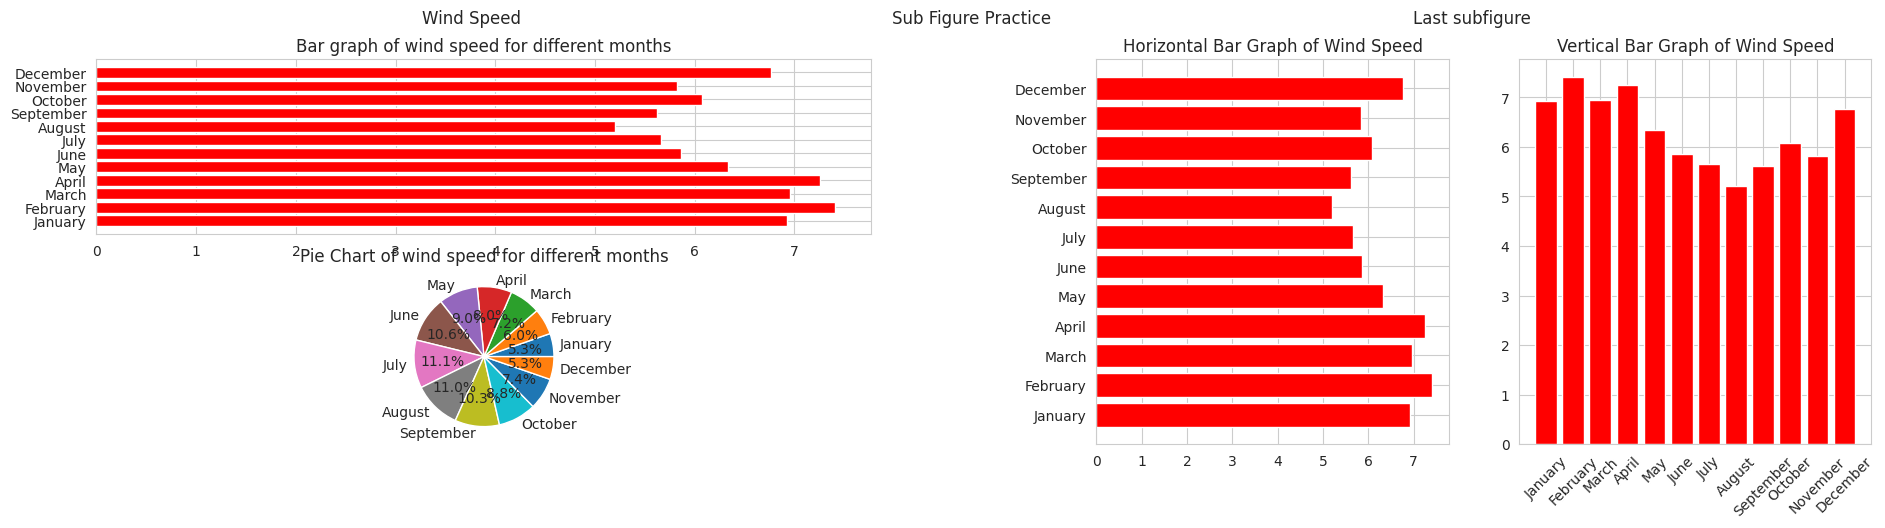

In [366]:
fig = plt.figure(figsize=(20, 5))

# Creating four subfigures
sfigs = fig.subfigures(1, 2, width_ratios=[1, 1])

# Adding subplots to first subfigure:
first_ax = sfigs[0].subplots(2, 1)
sfigs[0].suptitle('Wind Speed')

first_ax[0].barh(table.index, table['Data.Wind.Speed'], color='red')
first_ax[0].set_title('Bar graph of wind speed for different months')

first_ax[1].pie(table['Data.Temperature.Avg Temp'], labels=table.index, autopct='%1.1f%%')
first_ax[1].set_title('Pie Chart of wind speed for different months')

# Add subplots to the last subfigure:
last_ax = sfigs[1].subplots(1, 2)
sfigs[1].suptitle('Last subfigure')

last_ax[0].barh(table.index, table['Data.Wind.Speed'], color='red')
last_ax[0].set_title('Horizontal Bar Graph of Wind Speed')

last_ax[1].bar(table.index, table['Data.Wind.Speed'], color='red')
last_ax[1].set_title('Vertical Bar Graph of Wind Speed')
last_ax[1].set_xticklabels(table.index, rotation = 45)
# fig.tight_layout()
# suptitle for the main figure:
fig.suptitle('Sub Figure Practice')
plt.show()


## Plotting image

Creating Random Noisy Image of different sizes of 3 channels and the plotting them

In [367]:
# Create some example images
image1 = np.random.rand(32, 32, 3)  
image2 = np.random.rand(64, 64, 3)  
image3 = np.random.rand(128, 128, 3) 

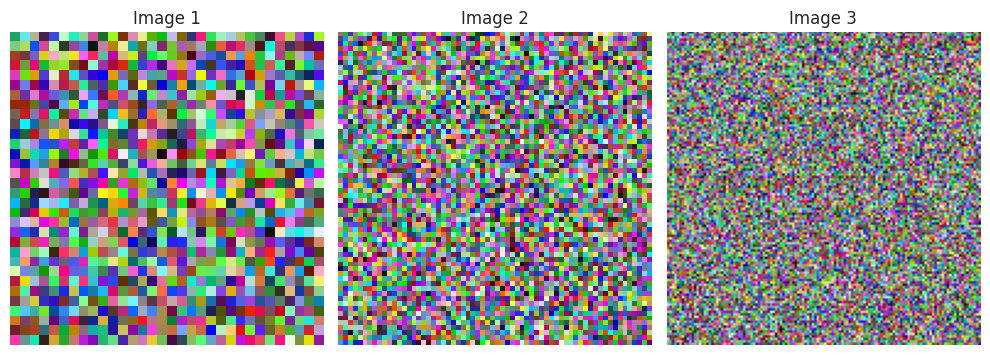

In [368]:
# Plot images using subplots
plt.figure(figsize=(10, 5))  # Set figure size

# Subplot 1
plt.subplot(1, 3, 1)  # 1 row, 3 columns, position 1
plt.imshow(image1)
plt.title('Image 1')
plt.axis('off')  # Turn off axis

# Subplot 2
plt.subplot(1, 3, 2)  # 1 row, 3 columns, position 2
plt.imshow(image2)
plt.title('Image 2')
plt.axis('off')  # Turn off axis

# Subplot 3
plt.subplot(1, 3, 3)  # 1 row, 3 columns, position 3
plt.imshow(image3)
plt.title('Image 3')
plt.axis('off')  # Turn off axis

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Show the plot

# Seaborn

Built on top of Matplotlib, Seaborn is a well-known Python library for data visualization that offers a user-friendly interface for producing visually appealing and informative statistical graphics. 

In [369]:
import seaborn as sns

## Relational Plot

### Scatter Plot

Text(0.5, 1.0, ' Wind and Temperature')

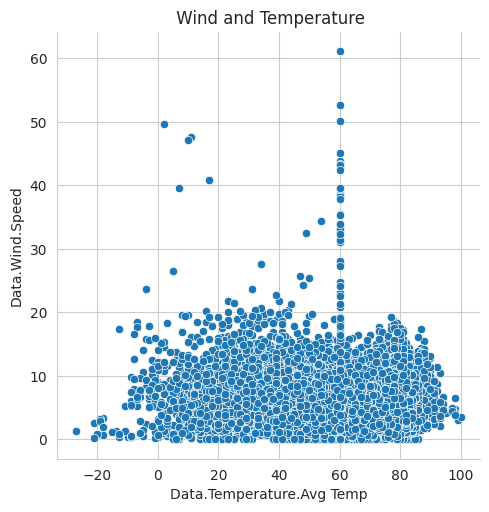

In [370]:
# Scatter Plot
sns.relplot(data = df , x = 'Data.Temperature.Avg Temp' , y = 'Data.Wind.Speed', kind = 'scatter')
plt.title(' Wind and Temperature')

### Scatter Plot using Axes level function

Text(0.5, 1.0, 'Wind vs Temperature using Axes Function')

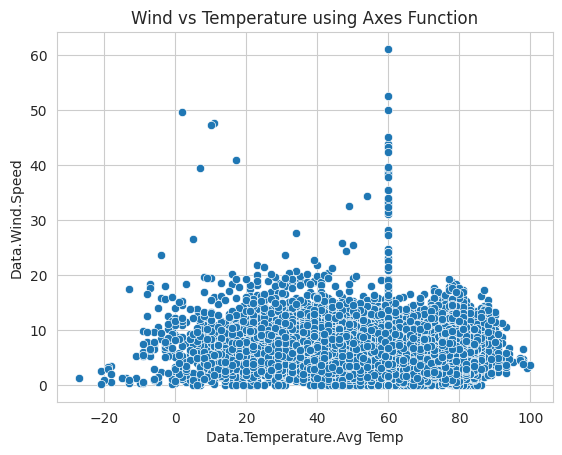

In [371]:
# Using axes level function
sns.color_palette('rocket_r')
ax = sns.scatterplot(data = df ,x = 'Data.Temperature.Avg Temp' , y = 'Data.Wind.Speed'  )
ax.set_title('Wind vs Temperature using Axes Function')

### Line plot 

Text(0.5, 1.0, 'Average Data Temperature across different months')

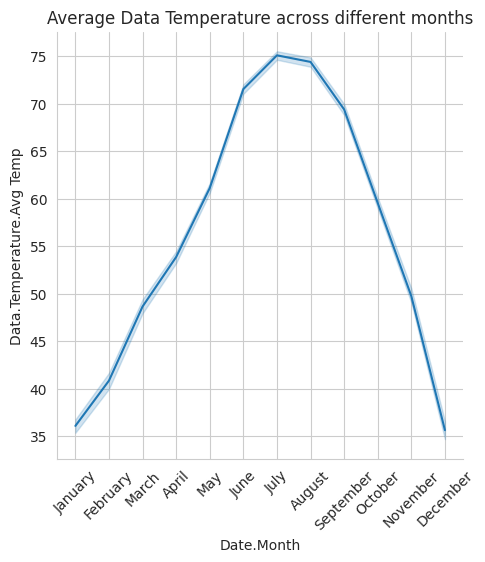

In [372]:
# Line Plot
sns.relplot(data =df , y = 'Data.Temperature.Avg Temp', x = 'Date.Month', kind = 'line')
plt.xticks(rotation = 45)
plt.title('Average Data Temperature across different months')

# Distribution Plot

### Histogram Plot

<Axes: xlabel='Data.Temperature.Avg Temp', ylabel='Count'>

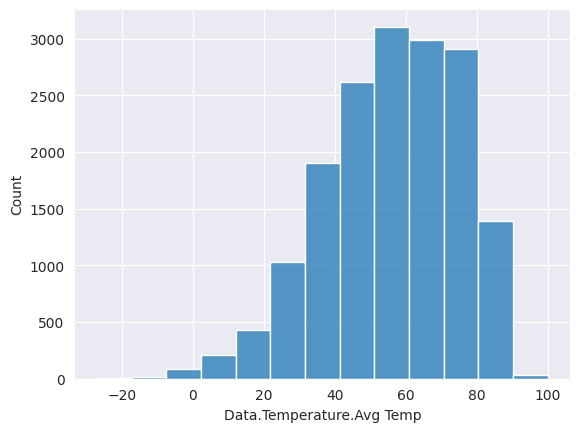

In [373]:
# Histogram plot
# Plotting Histogram
df = pd.read_csv('/home/swodesh/Documents/EKbana/swodeshsharma/Task17_Image_plot/weather.csv')
sns.set_style("darkgrid")
sns.histplot(data= df['Data.Temperature.Avg Temp'] , binwidth= 10)

### Multiple Histogram

<Axes: xlabel='Data.Temperature.Avg Temp', ylabel='Count'>

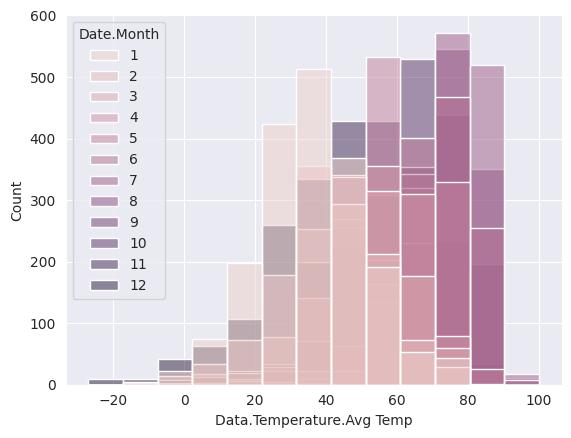

In [374]:
sns.histplot(data= df, x = 'Data.Temperature.Avg Temp' , binwidth= 10 , hue= 'Date.Month')

### KDE Plot

<Figure size 100x400 with 0 Axes>

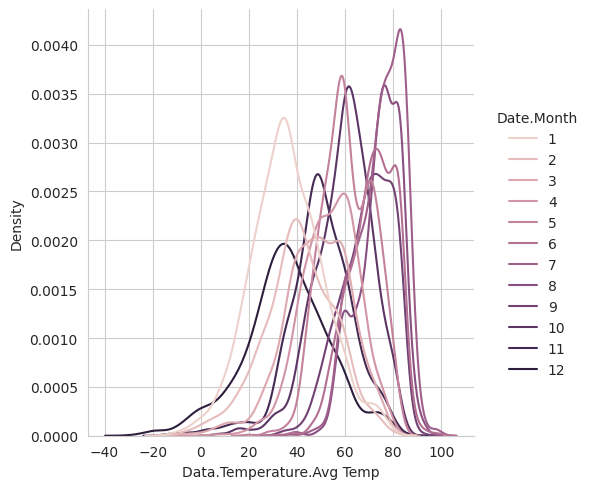

In [375]:
# KDE plot
plt.figure(figsize=(1,4))
sns.set_style("whitegrid")
sns.displot(data= df, x = 'Data.Temperature.Avg Temp', kind= 'kde' , hue= 'Date.Month')

### KDE Plot Along with histogram plot

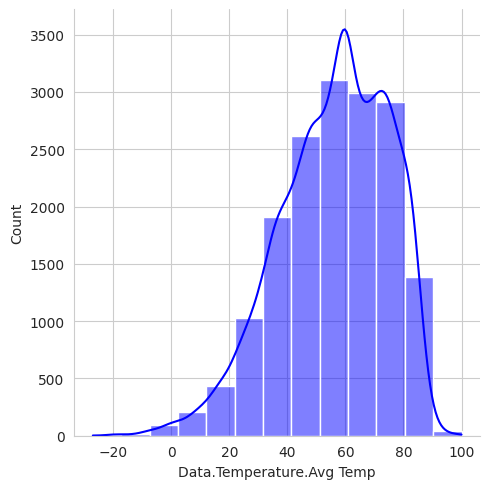

In [376]:
# KDE Plot along with histogram plot
sns.displot(data=df ,x='Data.Temperature.Avg Temp',kind='hist',kde=True ,  binwidth= 10 , color= 'blue')

# Categorical Plot

In [377]:
weather_data = pd.read_csv('/home/swodesh/Documents/EKbana/swodeshsharma/Task17_Image_plot/weather.csv')

### Bar plot in Seaborn

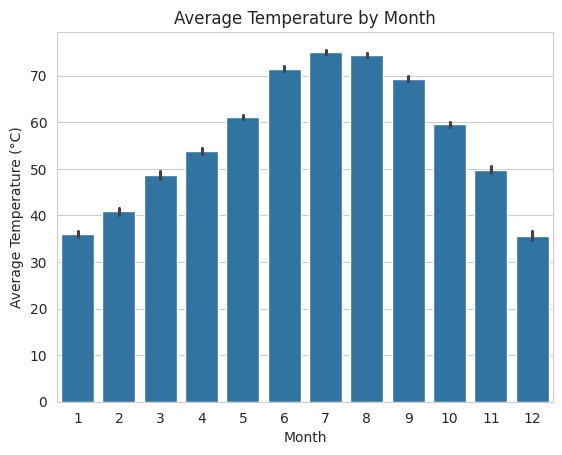

In [378]:
# Bar plot - Average Temperature by Month
sns.barplot(x='Date.Month', y='Data.Temperature.Avg Temp', data=weather_data)
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.show()

### Count Plot seaborn

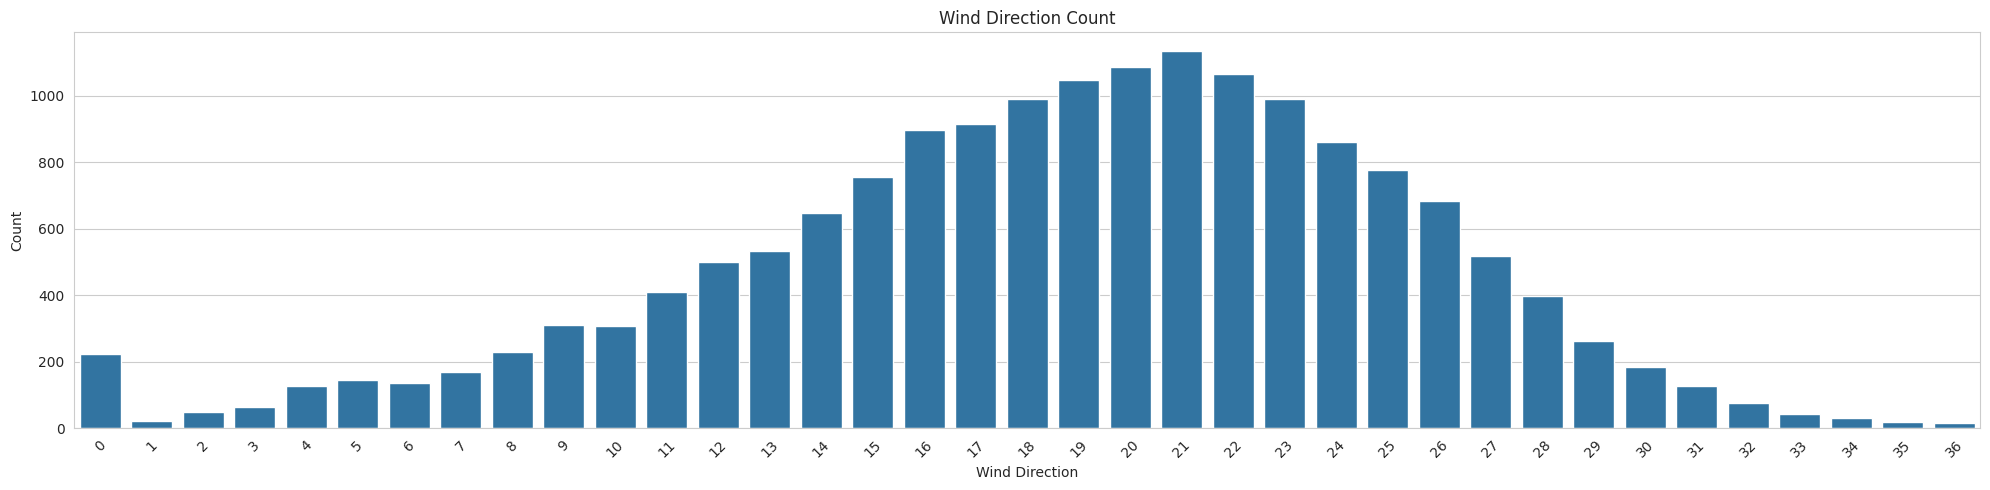

In [379]:
# Count plot - Wind Direction
plt.figure(figsize=(20,5))
sns.countplot(x='Data.Wind.Direction', data=weather_data)
plt.title('Wind Direction Count')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

### Box plot seaborn

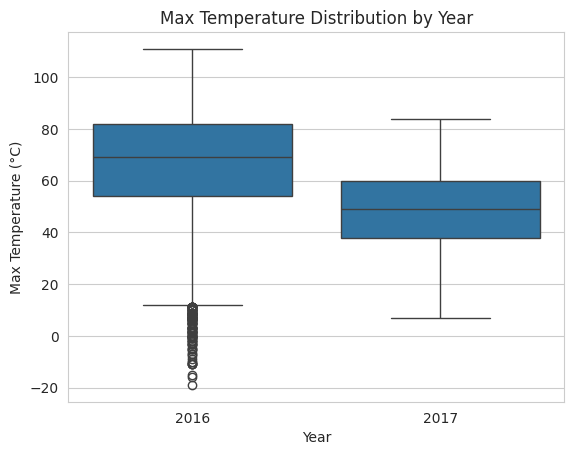

In [380]:
# Box Plot - Max Temperature by Year
sns.boxplot(x='Date.Year', y='Data.Temperature.Max Temp', data=weather_data)
plt.title('Max Temperature Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Max Temperature (°C)')
plt.show()

### Violin Plot Seaborn

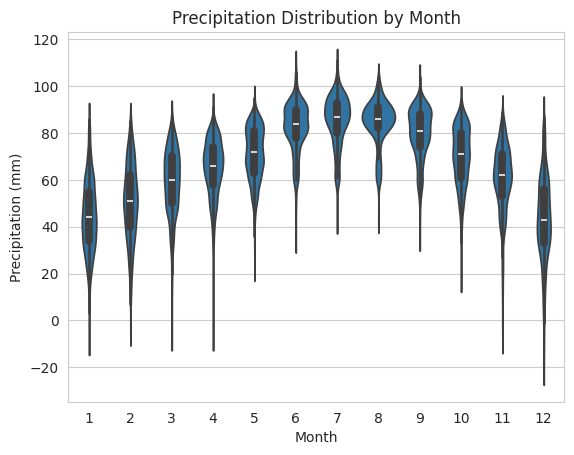

In [381]:
# Violin plot - Precipitation by Month
sns.violinplot(x='Date.Month', y='Data.Temperature.Max Temp', data=weather_data)
plt.title('Precipitation Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.show()


### Point Plot Seaborn

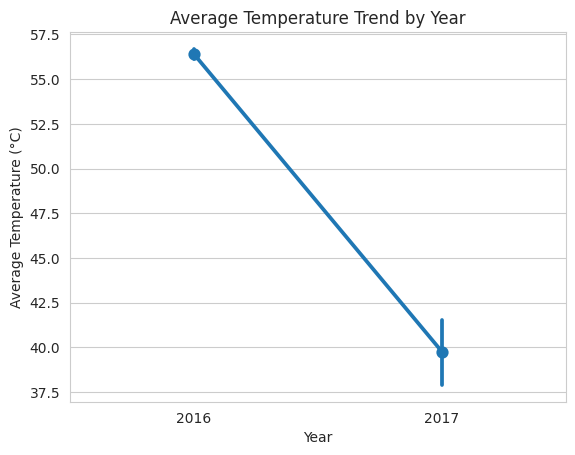

In [382]:
# Point Plot - Average Temperature by Year
sns.pointplot(x='Date.Year', y='Data.Temperature.Avg Temp', data=weather_data)
plt.title('Average Temperature Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

### Strip Plot Seaborn

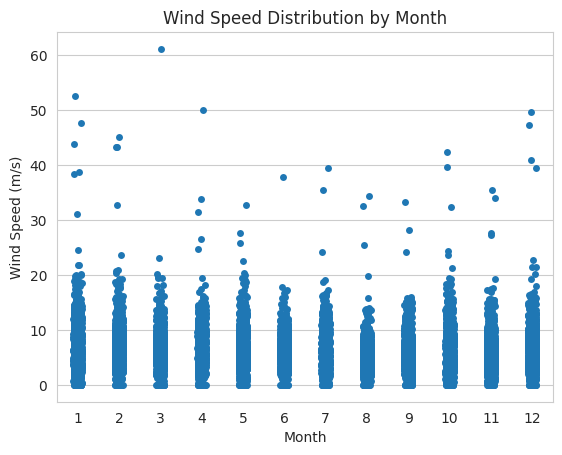

In [383]:

# Strip Plot - Wind Speed by Month
sns.stripplot(x='Date.Month', y='Data.Wind.Speed', data=weather_data)
plt.title('Wind Speed Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.show()

### Regression Plot Seaborn

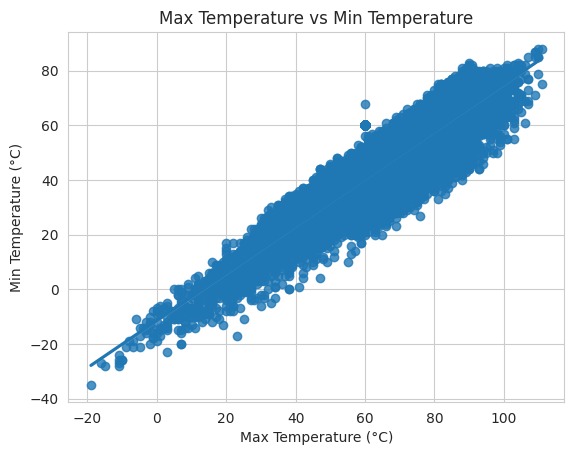

In [384]:

# Regression Plot - Max Temperature vs Min Temperature
sns.regplot(x='Data.Temperature.Max Temp', y='Data.Temperature.Min Temp', data=weather_data)
plt.title('Max Temperature vs Min Temperature')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Min Temperature (°C)')
plt.show()

### Heatmap or Correlation Plot

This shows the correlation between different variables

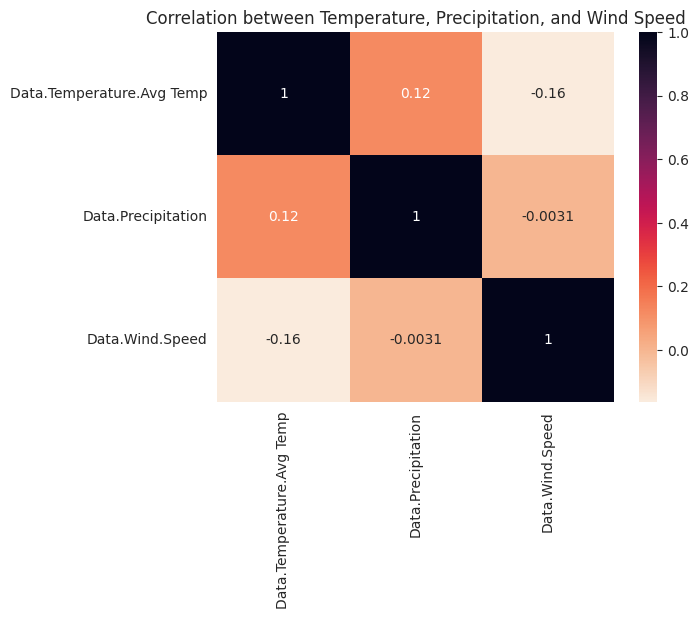

In [385]:

# Heatmap - Correlation between Temperature, Precipitation, and Wind Speed
weather_corr = weather_data[['Data.Temperature.Avg Temp', 'Data.Precipitation', 'Data.Wind.Speed']].corr()
sns.heatmap(weather_corr, annot=True, cmap='rocket_r')
plt.title('Correlation between Temperature, Precipitation, and Wind Speed')
plt.show()

## Multi Plot

### Join Plot

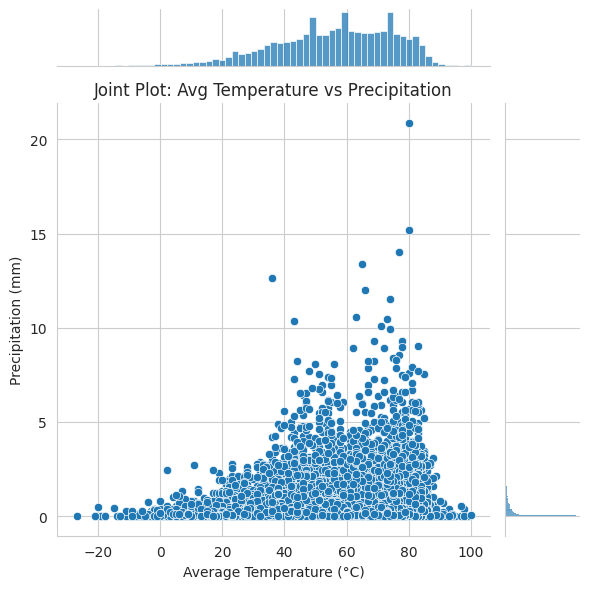

In [386]:
# Multi plot - Joint Plot and Pair Plot
sns.jointplot(x='Data.Temperature.Avg Temp', y='Data.Precipitation', data=weather_data)
plt.title('Joint Plot: Avg Temperature vs Precipitation')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.tight_layout()
plt.show()

### Pair plot

It also known as a scatterplot matrix, is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset.

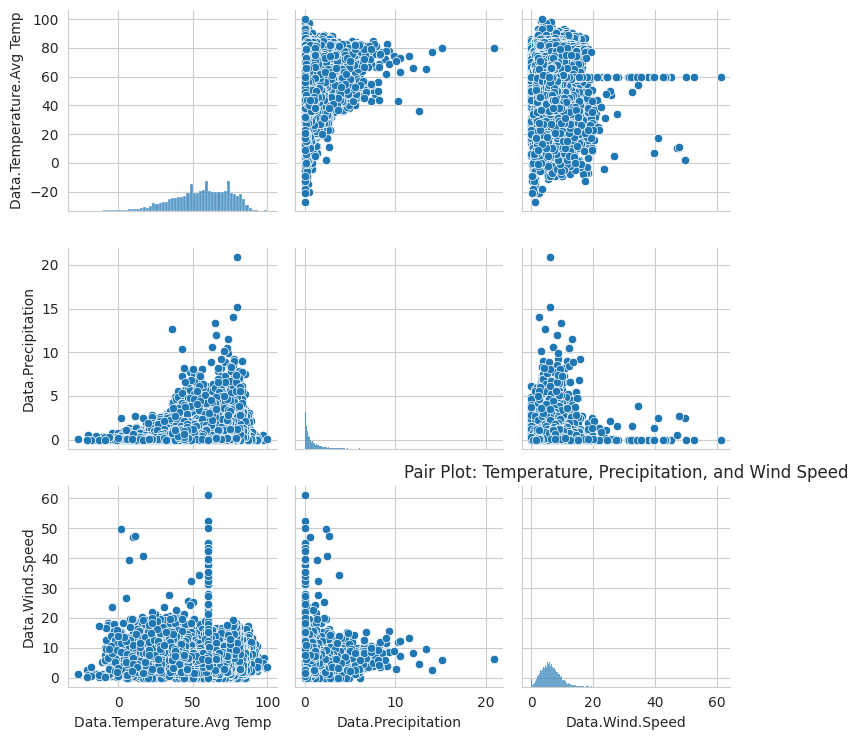

In [387]:

sns.pairplot(weather_data[['Data.Temperature.Avg Temp', 'Data.Precipitation', 'Data.Wind.Speed']])
plt.title('Pair Plot: Temperature, Precipitation, and Wind Speed')
plt.tight_layout()
plt.show()



### Styling Legends:
 


1. **Customizing Legend Position and Labels:** 


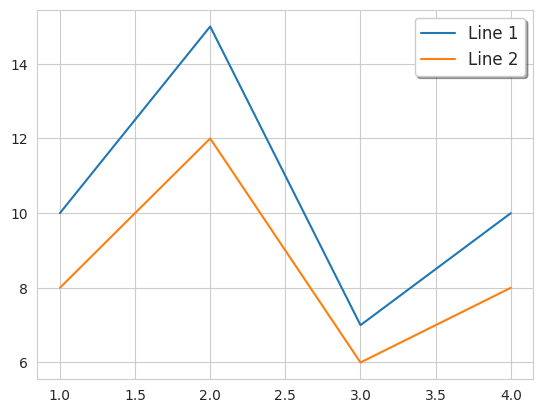

In [391]:
# Sample data
x = [1, 2, 3, 4]
y1 = [10, 15, 7, 10]
y2 = [8, 12, 6, 8]

plt.plot(x, y1, label='Line 1')
plt.plot(x, y2, label='Line 2') 
plt.legend(loc='upper right', fontsize='large', shadow=True) 
plt.show()

2. **Changing Legend Title:** 

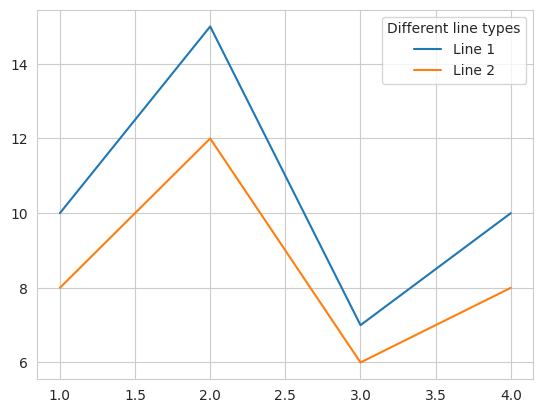

In [395]:
plt.plot(x, y1, label='Line 1')
plt.plot(x, y2, label='Line 2')

# Change legend title
plt.legend(title='Different line types')

plt.show()


### Styling Colors and Styles:

1. **Customizing Line Colors and Styles:**

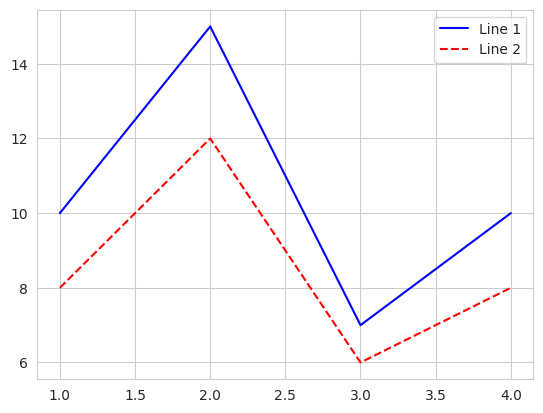

In [400]:
plt.plot(x, y1, color='blue', linestyle='-', label='Line 1')  # Solid blue line
plt.plot(x, y2, color='red', linestyle='--', label='Line 2')  # Dashed red line

plt.legend()
plt.show()


2. **Using Color Maps:**
 

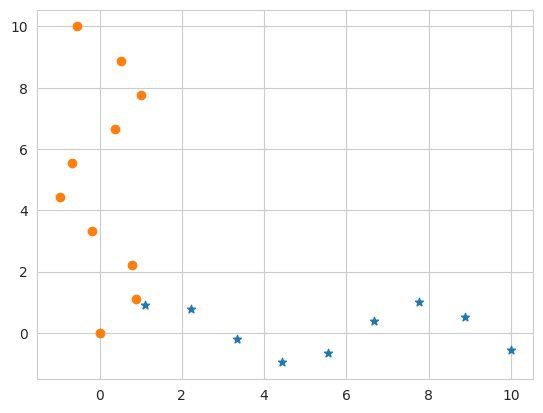

In [407]:
# Sample data
x = np.linspace(0, 10, 10)
y = np.sin(x)

# Using colormap for line color
plt.scatter(x, y, marker = '*') 
plt.scatter(y, x, marker = 'o') 
plt.show()